In [14]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

In [15]:
country_df = pd.read_csv('resources/merged_df_no_iso_code.csv')
country_df.head()

,country,iso_code,date,total_vaccinations_x,people_vaccinated_x,people_fully_vaccinated_x,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred_x,people_vaccinated_per_hundred_x,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Algeria,DZA,1/29/2021,0.0,NaN,NaN,NaN,NaN,0.00,NaN,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.754
1,Algeria,DZA,1/30/2021,30.0,NaN,NaN,30.0,30.0,0.00,NaN,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.754
2,Andorra,AND,1/25/2021,576.0,576.0,NaN,NaN,NaN,0.75,0.75,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858
3,Andorra,AND,1/26/2021,NaN,NaN,NaN,NaN,66.0,NaN,NaN,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858
4,Andorra,AND,1/27/2021,NaN,NaN,NaN,NaN,66.0,NaN,NaN,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858


In [16]:
country_df["total_vaccinations"]=country_df["total_vaccinations_x"].fillna(0)
country_df["people_vaccinated"]=country_df["people_vaccinated_x"].fillna(0)
country_df["people_fully_vaccinated"]=country_df["people_fully_vaccinated_x"].fillna(0)
country_df["daily_vaccinations_raw"]=country_df["daily_vaccinations_raw"].fillna(0)
country_df["daily_vaccinations"]=country_df["daily_vaccinations"].fillna(0)
country_df["total_vaccinations_per_hundred"]=country_df["total_vaccinations_per_hundred_x"].fillna(0)
country_df["people_vaccinated_per_hundred"]=country_df["people_vaccinated_per_hundred_x"].fillna(0)
country_df["people_fully_vaccinated_per_hundred"]=country_df["people_fully_vaccinated_per_hundred_x"].fillna(0)
country_df["daily_vaccinations_per_million"]=country_df["daily_vaccinations_per_million"].fillna(0)
country_df["new_cases_smoothed"]=country_df["new_cases_smoothed"].fillna(0)
country_df["people_fully_vaccinated_per_hundred_y"]=country_df["people_fully_vaccinated_per_hundred_y"].fillna(0)

In [17]:
country_df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations_x',
       'people_vaccinated_x', 'people_fully_vaccinated_x',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred_x', 'people_vaccinated_per_hundred_x',
       'people_fully_vaccinated_per_hundred_x',
       'daily_vaccinations_per_million', 'vaccines', 'source_name',
       'source_website', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'n

In [18]:
country_group=country_df.groupby("country").sum()
country_million=country_group["daily_vaccinations_per_million"]
country_sort=country_million.sort_values(axis=0, ascending=False)
country_top=country_sort.head(10)
country_top.reset_index
country_top.head()

country
Israel                  571534.0
Gibraltar               469237.0
United Arab Emirates    257755.0
Seychelles              255939.0
United Kingdom          129205.0
Name: daily_vaccinations_per_million, dtype: float64

Text(0.5, 1.0, 'total vaccinations per million')

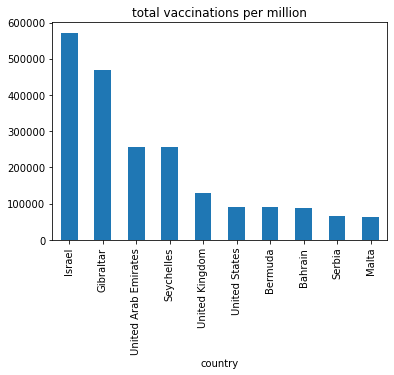

In [42]:
country_top.plot.bar()
plt.title("total vaccinations per million")

Text(0.5, 1.0, 'top countries of total vaccinations per hundred')

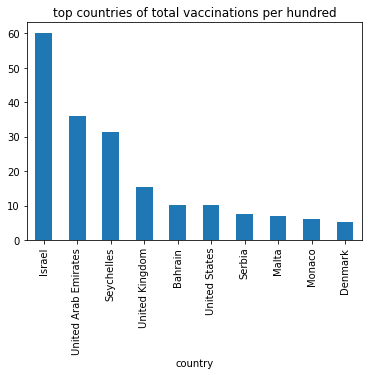

In [43]:
country_group=country_df.groupby("country")
country_hundred=country_group["total_vaccinations_per_hundred_y"]
country_total_hundred=country_hundred.apply(np.max)
country_sorth=country_total_hundred.sort_values(axis=0, ascending=False)
country_total=country_sorth.head(10)
country_total.plot.bar()
plt.title("top countries of total vaccinations per hundred")

Text(0.5, 1.0, 'top countries of fulling vaccinations per hundred')

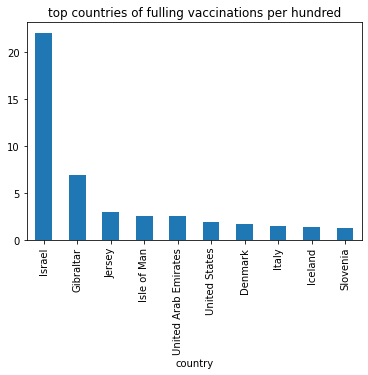

In [44]:
country_group=country_df.groupby("country")
country_fully_hundred=country_group["people_fully_vaccinated_per_hundred_x"]
country_fully=country_fully_hundred.apply(np.max)
country_fully_sort=country_fully.sort_values(axis=0, ascending=False)
country_fully_top=country_fully_sort.head(10)
country_fully_top.plot.bar()
plt.title("top countries of fulling vaccinations per hundred")

Text(10, 5750, 'y = 77.16x + 5601.75')

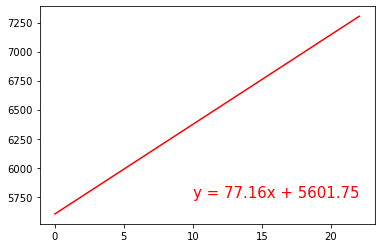

In [22]:
# I don't think line chart can explain anything.we need more data to create a meaningful linear regression
israel_df=country_df.loc[country_df["country"]=="Israel",:]
x_values= israel_df['people_fully_vaccinated_per_hundred_y']
y_values= israel_df['new_cases_smoothed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5750),fontsize=15,color="red")


Text(0, 0.5, 'new_cases')

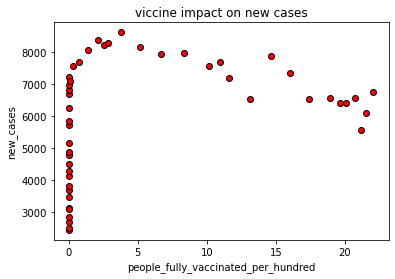

In [41]:
# I think this scatter plot is changing over time, as people_fully_vaccinated_per_hundred increased the new cases is decreasing.
israel_fully=israel_df[["people_fully_vaccinated_per_hundred_y"]]
israel_new=israel_df[["new_cases_smoothed"]]
plt.scatter(israel_fully,israel_new , marker="o", facecolors="red", edgecolors="black")
plt.title("viccine impact on new cases")
plt.xlabel("people_fully_vaccinated_per_hundred")
plt.ylabel("new_cases")

<AxesSubplot:xlabel='daily_vaccinations_per_million', ylabel='new_cases_smoothed'>

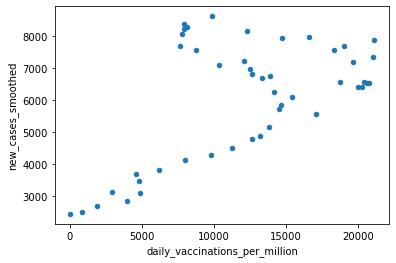

In [24]:
israel_df.plot(kind="scatter", x="daily_vaccinations_per_million", y="new_cases_smoothed")

<AxesSubplot:xlabel='vaccines'>

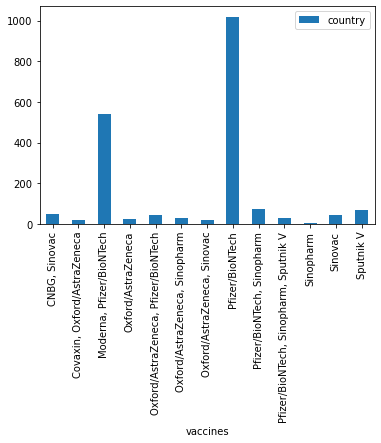

In [39]:
# I was trying to make a bar chart which can show the most pupular vaccines, not sure if we need it, just saw it 
# from kaggle code.
vaccine_group=country_df[["country","vaccines"]]
vaccine_df=vaccine_group.groupby("vaccines").count()
vaccine_df.plot.bar()